!["ttz'](https://img0.baidu.com/it/u=322485378,1023346863&fm=26&fmt=auto&gp=0.jpg)

## Project 2:  Inside the Met 

**A closer look at the treasures at The Metropolitan Museum of Art through a data science perspective**

Team:  Stephanie He, George Jiao, and Tiantian Zhao 

### <font color='red'>1. Overview

The Metropolitan Museum of Art of New York City, known as “the Met”, is the largest art museum in the
United States. With over 2 million artworks, visitors will not be able quick browsing through
a meaningful amount of collection within a short period of time. Thanks to the Met Museum openaccess,
nearly a quarter of (~470k) of artworks have been indexed and its key specifics categorized into a dataset
(the “dataset”). Based on this dataset, we intend to present an overview, from top-down perspective, on
what’s included in the Met, through a thorough analysis on the dataset, and visualization of key findings.

### <font color='red'>2. Initial Exploratory and Data Preparation

The initial exploration includes data completeness and cleanness. 

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import urllib.request
import requests
import io
from PIL import Image
from matplotlib.pyplot import imshow

# Enable plotting in jupyter
%matplotlib inline

# Read in csv file with Pandas 
met_art = pd.read_csv('MetObjects.csv')

# Change the column names by replace space with '_'
met_art = pd.DataFrame(met_art)
met_art.columns = met_art.columns.str.replace(' ', '_')
# met_art.info() # Print current column names

# Get ready for DV - Functions to make pie and bar
def plot_pie_chart(values, labels, title, explode = (0, 0, 0)):
    fig1, ax1 = plt.subplots()
    ax1.pie(values, colors = colors, labels=labels,autopct='%1.1f%%', explode = explode, pctdistance = 0.6, labeldistance = 1.1,shadow=False)
    plt.title(title, size=14, pad=15)
    plt.show()
    
# add:  xaix
def plot_bar_chart(df, column, x,figsize=(10,5), title=None):
    counts = df[column].value_counts()[:10]
    plt.figure(figsize=figsize)
    sns.barplot(counts.values,counts.index,linewidth=0.5,color ='red',saturation=0.7)   #, facecolor=(1, 1, 1, 0)
    plt.xlabel(x,size=14, labelpad=15)
    # sns.set_style('darkgrid', {'font.sans-serif':['SimHei', 'Arial']})
    plt.xticks(rotation=0)
    plt.ylabel(column, size=14)
    plt.title(title, size=14, pad=21)
    plt.show()

C:\Users\helip\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,7,10,11,12,13,14,22,34,35,36,37,38,39,40,41,42,43,44,46) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
# define color
color_met = ["red","#978a84"]  #red and grey 
colors = ["red", "grey","#d9544d", "#c85a53", "#fc5a50", "#c8aca9","#b17261","#f29e8e","#4b0101","#840000"]
# colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748']

In [3]:
# Create a function to pull image and show in notebook and local drive
def OpenImage(url, img_title):
    im = Image.open(requests.get(url, stream=True).raw)
    imshow(im)
    title_obj = plt.title(img_title)
    image = Image.open(urllib.request.urlopen(url))
    plt.rcParams["axes.grid"] = False
    image.show()
    
# Preview the art below and pop-up one on laptop
# Locate Arts in Blue Period (1901-1904)
met_art2 = pd.DataFrame(met_art)
met_art2.columns = met_art2.columns.str.replace(' ', '_')
data2 = met_art2[['Object_Number','Object_Name','Title','Artist_Display_Name','Is_Highlight','Is_Public_Domain','Object_Begin_Date']]
# data2[(data2['Artist_Display_Name'] == 'Vincent van Gogh') & (data2['Object_Begin_Date'] >= 1888)] 

In [4]:
# Optional: A set of colums with more than 90% missing values, change number as needed.
missing_cols = set(met_art.columns[met_art.isnull().mean() > 0.90])
print(len(missing_cols))
print(missing_cols)

17
{'Reign', 'Subregion', 'Locale', 'Artist_Suffix', 'Dynasty', 'Rights_and_Reproduction', 'Object_Wikidata_URL', 'Region', 'Gallery_Number', 'Metadata_Date', 'Excavation', 'City', 'County', 'Locus', 'River', 'State', 'Portfolio'}


In [5]:
met_art.shape

(475020, 54)

In [6]:
met_art.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475020 entries, 0 to 475019
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Object_Number            475020 non-null  object 
 1   Is_Highlight             475020 non-null  bool   
 2   Is_Timeline_Work         475020 non-null  bool   
 3   Is_Public_Domain         475020 non-null  bool   
 4   Object_ID                475020 non-null  int64  
 5   Gallery_Number           39630 non-null   object 
 6   Department               475020 non-null  object 
 7   AccessionYear            470889 non-null  object 
 8   Object_Name              473626 non-null  object 
 9   Title                    445600 non-null  object 
 10  Culture                  206816 non-null  object 
 11  Period                   90509 non-null   object 
 12  Dynasty                  23145 non-null   object 
 13  Reign                    11180 non-null   object 
 14  Port

In [7]:
# Deal with missing values

In [8]:
# Columns without missing values
no_nulls = set(met_art.columns[met_art.isnull().mean()==0])

# Only 10 columns have no missing values
print(len(no_nulls))
print(no_nulls)

10
{'Object_End_Date', 'Is_Public_Domain', 'Repository', 'Object_Begin_Date', 'Is_Highlight', 'Link_Resource', 'Object_ID', 'Object_Number', 'Is_Timeline_Work', 'Department'}


In [9]:
# A set of colums with more than 50% missing values
missing_cols = set(met_art.columns[met_art.isnull().mean() > 0.50])
print(len(missing_cols))
print(missing_cols)

32
{'Period', 'Reign', 'Object_Wikidata_URL', 'Artist_Suffix', 'Region', 'Culture', 'Artist_Gender', 'Artist_Wikidata_URL', 'Portfolio', 'Tags', 'Artist_End_Date', 'Locale', 'Gallery_Number', 'County', 'River', 'Artist_Begin_Date', 'Artist_ULAN_URL', 'Geography_Type', 'Dynasty', 'Rights_and_Reproduction', 'Tags_Wikidata_URL', 'Excavation', 'Artist_Nationality', 'City', 'Locus', 'Artist_Display_Bio', 'Subregion', 'Artist_Prefix', 'Country', 'Tags_AAT_URL', 'Metadata_Date', 'State'}


In [10]:
# A set of colums with more than 75% missing values
missing_cols = set(met_art.columns[met_art.isnull().mean() > 0.75])
print(len(missing_cols))
print(missing_cols)

22
{'Period', 'Reign', 'Object_Wikidata_URL', 'Artist_Suffix', 'Region', 'Artist_Gender', 'Portfolio', 'Locale', 'Gallery_Number', 'County', 'River', 'Geography_Type', 'Dynasty', 'Rights_and_Reproduction', 'Excavation', 'City', 'Locus', 'Subregion', 'Artist_Prefix', 'Country', 'Metadata_Date', 'State'}


In [11]:
# See the list of columns with mostly (>75%) missing values
for col in missing_cols:
    print(col)

Period
Reign
Object_Wikidata_URL
Artist_Suffix
Region
Artist_Gender
Portfolio
Locale
Gallery_Number
County
River
Geography_Type
Dynasty
Rights_and_Reproduction
Excavation
City
Locus
Subregion
Artist_Prefix
Country
Metadata_Date
State


In [12]:
# Number of missing values for each column, sorted in descending order
met_art.isnull().sum().sort_values(ascending=False)

Metadata_Date              475020
River                      472922
State                      472491
Locus                      467620
County                     466662
Reign                      463840
Artist_Suffix              463069
Locale                     459411
Excavation                 459010
Subregion                  452960
Object_Wikidata_URL        452819
Dynasty                    451875
Portfolio                  451647
Rights_and_Reproduction    451394
Region                     443673
City                       443017
Gallery_Number             435390
Geography_Type             415648
Country                    399722
Artist_Prefix              385328
Period                     384511
Artist_Gender              373373
Artist_Nationality         292645
Culture                    268204
Artist_Wikidata_URL        266373
Artist_ULAN_URL            261810
Tags_Wikidata_URL          260234
Tags_AAT_URL               258928
Tags                       258456
Artist_Display

#### <font color='red'> Findings

The key takeaway from this exploration is - nearly half of the variables are in a relatively high quality in terms of completeness. Team decides to focus on this half as possible in order to achieve a quality analysis. 

In [13]:
# Functions used
# categorize purchase and gift
def purchase(name):
    name = str(name)
    if 'purchase' in name.lower():
        return 'purchase'
    else:
        return 'gift'

# other functions used
def year(a):
    if len(str(a)) == 4 or len(str(int(a))) == 4 or len(str(a)) == 3 or len(str(int(a))) == 3:
        return int(a)
    elif "B.C." in str(a) or "b.c." in str(a):
        return "pre-history"
    else:
        return 0

# clean outlier of years
def year_outlier(x):
    if x <0:
        return "pre-history"
    elif x > 2021:
        return "future"
    else:
        return x

# clean outlier of years
def year_clean(group):
    group['AccessionYear'].str.count("/").sort_values(ascending = False)
    group['year'] = group["AccessionYear"].fillna(0)
    group.at[1, 'year'] = 7777
    group.at[179329, 'year'] = 2005
    group.at[391005, 'year'] = 2005
    return group["year"]

### <font color='red'>3. Exploratory Questions

Based on the initial data exploration results, team is intrigued and decided to focus on two main buckets of questions as follows: 


#### <font color='red'>Is the MET the same with what it appeares to be when we visit?
#####  We would like to take our audience to have a deeper look of the MET through different angles:
- 3.1 Who is the most collected artist? What is his/her work? 
- 3.2 Visitors are easily attracted by painting. So who has the most collected painting in the MET? Picasso?
- 3.3 The MET has experienced different directors since it was founded in 1870. Would the director drive the trend of collection type through the years?
- 3.4 Private collection deep-dive
- 3.5 If we take a deeper look into a collection by artist nationaly, for example, China, what are the collections? How are they displayed?

#### <font color='red'>How does Met change over time? Can Met sustain? 
- 3.6 What is the source of collections (Gift / purchase) 
- 3.7 Are donation concentrated?
- 3.8 Most artwork are modern time art. 
- 3.9 Accession quantity count by decade  
- 3.10 Comprehensive art collection for artist  

#### <font color='red'>3.1 Who is the most collected artist? What is his/her work?
**(Hypothesis)** Top artists with most collections at MET are always those commonly known ones.From common sense perspective, we usually believe that top artists with most collections at MET are those names everyone is familiar with, is that true?

In [14]:
# Change the column names by replace space with '_'
met_art = pd.DataFrame(met_art)
met_art.columns = met_art.columns.str.replace(' ', '_')

In [15]:
met_art['Artist_Display_Name'].value_counts()[:10]

Walker Evans                       7433
Kinney Brothers Tobacco Company    4163
Unknown                            3558
W. Duke, Sons & Co.                3088
Allen & Ginter                     2960
Brewster & Co.                     2742
Goodwin & Company                  2652
Topps Chewing Gum Company          2273
American Tobacco Company           2067
Exhibit Supply Company             1522
Name: Artist_Display_Name, dtype: int64

C:\Users\helip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


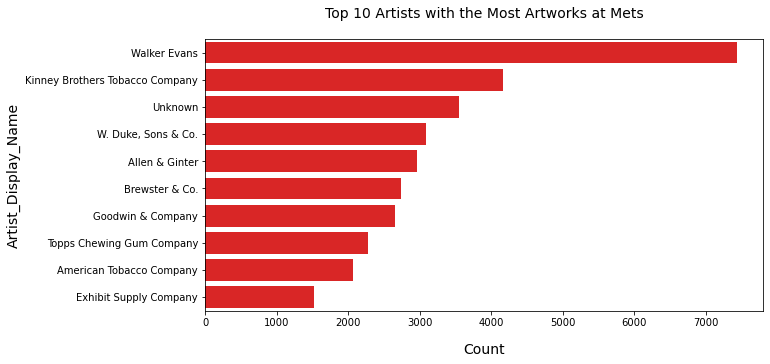

In [16]:
plot_bar_chart(met_art, column="Artist_Display_Name", x = "Count", title='Top 10 Artists with the Most Artworks at Mets')

#### <font color='red'>3.1 Finding: 
- None of the top 10 artists are famous and many of them are even company names. 
- To dive deeper, naturally two questions come up:
    1) Is this result valid, why company names are on the top artist list? 
    2) Who is Walker Evans? Why he has so many collections at MET? 

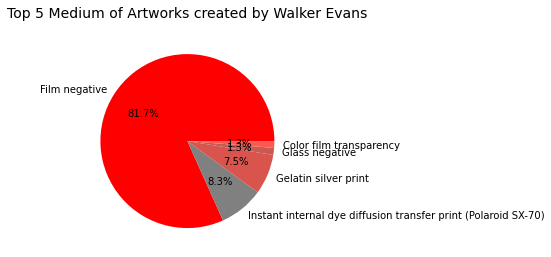

In [17]:
# Find out why Walker Evans is ranked at top 1
data5 = met_art[(met_art['Artist_Display_Name'] == 'Walker Evans')] 
values = data5['Medium'].value_counts()[:5].values
labels = data5['Medium'].value_counts()[:5].index
plot_pie_chart(values, labels, "Top 5 Medium of Artworks created by Walker Evans",explode = (0,0,0,0,0))

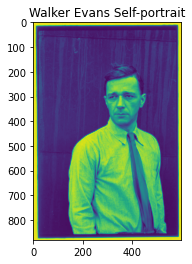

In [18]:
# Pull a portrait of Walker Evans
OpenImage("https://64parishes.org/wp-content/uploads/2012/10/2520.jpg","Walker Evans Self-portrait")

#### <font color='red'>3.1 Finding: 
    
Walker Evans (1903 - 1975) is one of the most influential artists of the twentieth century. His elegant, crystal-clear photographs and articulate publications have inspired several generations of artists. His most famous artworks is the documentory of the Great Depression. 

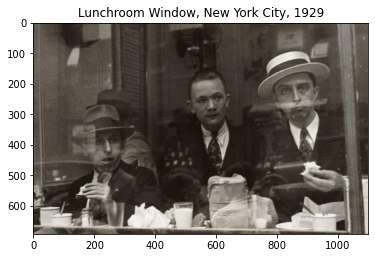

In [19]:
# Pull an example Walker Evans artwork
OpenImage("https://i.redd.it/1kn5jrnfooo01.jpg","Lunchroom Window, New York City, 1929")

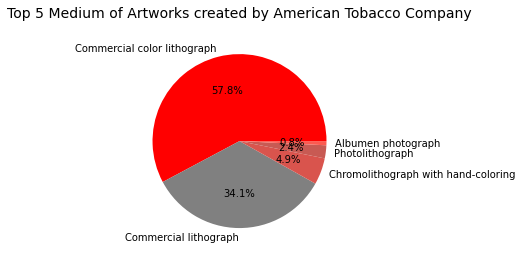

In [20]:
# Find out why American Tobacco Company is at the top
data5 = met_art[(met_art['Artist_Display_Name'] == 'American Tobacco Company')] 

# Artworks by country
values = data5['Medium'].value_counts()[:5].values
labels = data5['Medium'].value_counts()[:5].index

plot_pie_chart(values, labels, "Top 5 Medium of Artworks created by American Tobacco Company",explode = (0,0,0,0,0))

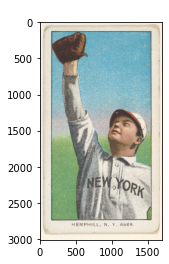

In [85]:
# Pull an example of Commercial color lithograph
OpenImage("https://upload.wikimedia.org/wikipedia/commons/b/b0/Hemphill%2C_New_York%2C_American_League%2C_from_the_White_Border_series_%28T206%29_for_the_American_Tobacco_Company_MET_DP824761.jpg"," ")

#### <font color='red'>3.1 Finding: 
    
As the creation of commercial graphs and photos are quicker, the volume is high thus put them at the top artist list rather than those famous artists we know in the history.

#### <font color='red'>3.2  Visitors are easily attracted by painting. Who has the most collected painting in the MET?

**(Hypothesis)** Famous artists like Picasso and Andy Warhol should have the most painting collected in the Met    


In [23]:
# Top 10 painting artist

#create subset dataframe containing only paintings
subset_p = met_art[met_art['Classification'] == "Paintings"]


#create top 10 artist by painting
p_top_artist = subset_p['Artist_Display_Name'].value_counts().sort_values(ascending = False)[:10].to_frame()
p_top_artist.index.name = 'Artist'
p_top_artist.rename({'Artist_Display_Name':'no_of_paintings'}, axis=1, inplace=True)

#remove non-name artist
p_top_artist = p_top_artist[((p_top_artist.index != 'Unidentified Artist') & (p_top_artist.index != 'French Painter'))]

In [24]:
p_top_artist.head()

,no_of_paintings
Artist,
Xie Zhiliu,344
Shibata Zeshin,74
Bhadrabahu,71
Katsushika Hokusai,63
Kawanabe Kyōsai,49


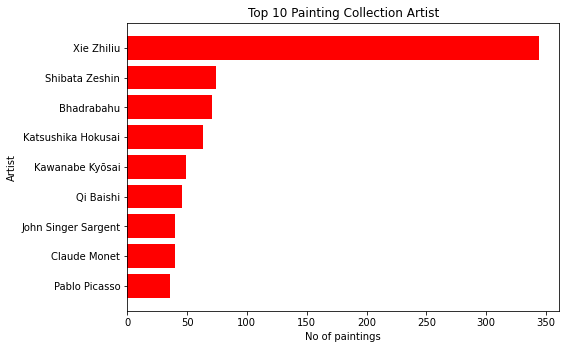

In [25]:
#Plot the bar chart

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.set_title('Top 10 Painting Collection Artist')
ax.set_ylabel('Artist')
ax.set_xlabel('No of paintings')

ax.barh(p_top_artist.index, p_top_artist.no_of_paintings, color ='red')
plt.gca().invert_yaxis()
y = p_top_artist.no_of_paintings

plt.show()

#### <font color='red'> 3.2 Findings

It is surprised to see that the most painting collection is from an artist called Xie Zhiliu. But most of the popular artists are at the top-10 list including Picasso and Monet
    
Xie Zhiliu (Chinese: 谢稚柳; 1910–1997) was a leading traditional painter, calligrapher, and art connoisseur of modern China. 

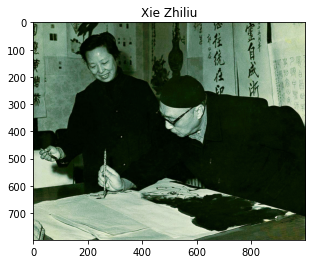

In [26]:
OpenImage('https://p7.pstatp.com/origin/pgc-image/1716c57390f14a038143ddcc3ed017dc.jpeg', 'Xie Zhiliu')

In [27]:
# Was planning to ues OpenImage to download the painting and painting name but the Met link does not allow the dowload
xie_image = subset_p.loc[(subset_p['Artist_Display_Name'] == 'Xie Zhiliu'),('Link_Resource', 'Title')]

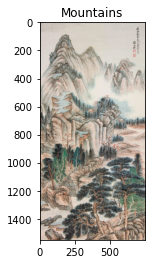

In [28]:
OpenImage('https://alchetron.com/cdn/xie-zhiliu-bc7edc7f-ef74-4e37-881b-fb7c611a343-resize-750.jpeg', 'Mountains')

#### <font color='red'>3.2  What are the top 10 nationality of the artist count by collections?

In [29]:
#create top 10 artiest nationality by painting
p_top_nationals = subset_p['Artist_Nationality'].value_counts().sort_values(ascending = False)[:10].to_frame()

p_top_nationals.index.name = 'Nationality'
p_top_nationals.rename({'Artist_Nationality':'no_of_paintings'}, axis=1, inplace=True)

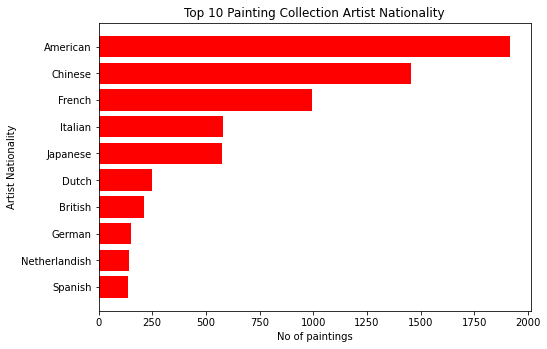

In [30]:
#plat the bar chart
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.set_title('Top 10 Painting Collection Artist Nationality')
ax.set_ylabel('Artist Nationality')
ax.set_xlabel('No of paintings')

ax.barh(p_top_nationals.index, p_top_nationals.no_of_paintings, color = 'red')
plt.gca().invert_yaxis()
y = p_top_artist.no_of_paintings

#### <font color='red'> 3.2 Findings

It is not surprising that most of the paintings come from American, French, and Italian artist. However, the Mets also has a huge collection of Asian paintings with Chinese and Japanese artist take the second and fifth places

#### <font color='red'>3.3 The MET has experienced different directors since it was founded in 1870. Would the director drive the trend of collection type through the years?
    
**(Hypothesis)** We think those directors would exhibit different collection preferences through their respective periods.

In [31]:
# Step 1: create a subset
subset_work = met_art.loc[:,['Object_ID', 'AccessionYear', 'Classification']]

In [32]:
#Step 2: select the top art type
by_work = subset_work.groupby('Classification')['Object_ID'].count().sort_values(ascending = False)
top_works = by_work.index.values[0:15]
top_works

array(['Prints', 'Prints|Ephemera', 'Photographs', 'Drawings', 'Vases',
       'Books', 'Ceramics', 'Textiles-Woven', 'Paintings',
       'Photographs|Ephemera', 'Glass', 'Negatives',
       'Prints|Ornament & Architecture', 'Textiles-Laces',
       'Drawings|Ornament & Architecture'], dtype=object)

In [33]:
# Step 3: create a new column 'classification1' to store modified art type
subset_work['classification1'] = subset_work['Classification'].apply(lambda x: x if x in top_works else 'Others') 

In [34]:
#Check the format of accessionyear. Two elements have two "/"

subset_work['AccessionYear'].str.count("/").sort_values(ascending = False)

179329    2.0
391005    2.0
393215    0.0
174621    0.0
174609    0.0
         ... 
475015    NaN
475016    NaN
475017    NaN
475018    NaN
475019    NaN
Name: AccessionYear, Length: 475020, dtype: float64

In [35]:
# Print out row 179329 and 391005 to check the date
print(subset_work.loc[179329, 'AccessionYear'])
print(subset_work.loc[391005, 'AccessionYear'])

2/15/2005
3/23/2020


In [36]:
# Change the two elements to the correct year
subset_work['year'] = subset_work['AccessionYear'].fillna(0)
subset_work.at[179329, 'year'] = 2005
subset_work.at[391005, 'year'] = 2020

In [37]:
#Obtain the name of director and period from google
names = ['Luigi Palma di Cesnola', 'Caspar Purdon Clarke', 'Edward Robinson', 'Herbert Eustis Winlock', 'Francis Henry Taylor',
'James Rorimer', 'Thomas Hoving', 'Philippe de Montebello', 'Thomas P. Campbell', 'Daniel Weiss', 'Max Hollein']
years = [[1879, 1904], [1904, 1910], [1910, 1931], [1932, 1939], [1940, 1955], [1955, 1966], [1967, 1977], [1977, 2008],
[2009, 2017], [2017, 2018], [2018]]

directors = {'name': names, 'years': years}
director_df = pd.DataFrame(directors)
director_df

,name,years
0,Luigi Palma di Cesnola,"[1879, 1904]"
1,Caspar Purdon Clarke,"[1904, 1910]"
2,Edward Robinson,"[1910, 1931]"
3,Herbert Eustis Winlock,"[1932, 1939]"
4,Francis Henry Taylor,"[1940, 1955]"
5,James Rorimer,"[1955, 1966]"
6,Thomas Hoving,"[1967, 1977]"
7,Philippe de Montebello,"[1977, 2008]"
8,Thomas P. Campbell,"[2009, 2017]"
9,Daniel Weiss,"[2017, 2018]"


In [38]:
# Create a function to specify director period

def which_director(year):
    year = int(year)
    if year >= 1879 and year < 1904:
        return 'Luigi Palma di Cesnola'
    elif year >= 1904 and year < 1910:
        return 'Caspar Purdon Clarke'
    elif year >= 1910 and year <= 1931:
        return 'Edward Robinson'
    elif year >= 1932 and year <= 1939:
        return 'Herbert Eustis Winlock'
    elif year >= 1940 and year < 1955:
        return 'Francis Henry Taylor'
    elif year >= 1955 and year <= 1966:
        return 'James Rorimer'
    elif year >= 1967 and year < 1977:
        return 'Thomas Hoving'
    elif year >= 1977 and year <= 2008:
        return 'Philippe de Montebello'
    elif year >= 2009 and year <= 2017:
        return 'Thomas Campbell'
    elif year >= 2018:
        return 'Mar Hollein'

In [39]:
#Step 4: Create a new column 'director' to present the correct directord
subset_work['director'] = subset_work.year.fillna(0).apply(which_director)
ts6 = subset_work.groupby('director')['classification1'].value_counts(normalize = True)
ts7 = ts6.unstack().fillna(0)

<ipython-input-40-4b020ecf4d57>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph2.set_yticklabels(['{:.1%}'.format(x) for x in vals])


Text(0, 1.05, 'Art type collection by director')

<Figure size 216x288 with 0 Axes>

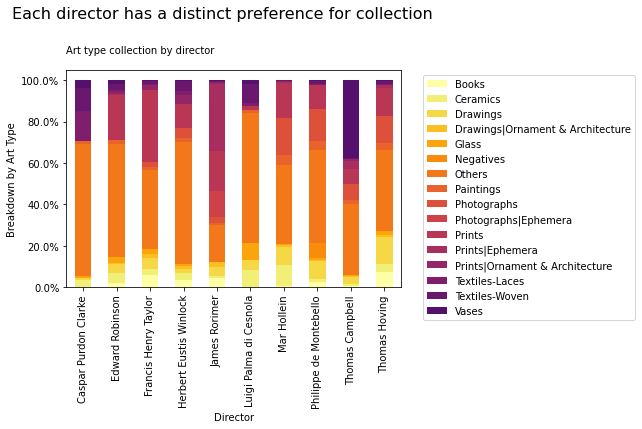

In [40]:
#Plot the chart
plt.figure(figsize=(3,4))
title_string = 'Each director has a distinct preference for collection'
subtitle_string = 'Art type collection by director'

n_categories = 20
colors1 = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

graph2 = ts7.plot.bar(stacked = True, ylabel = "Breakdown by Art Type", xlabel = "Director", color = colors1)
lables = ts7.columns
graph2.legend(lables, bbox_to_anchor=(1.05, 1), loc='upper left')
vals = graph2.get_yticks()
graph2.set_yticklabels(['{:.1%}'.format(x) for x in vals])

plt.suptitle(title_string, x=0, y=1.1, fontsize=16, ha='left', )
plt.title(subtitle_string, x=0, y=1.05, fontsize=10, ha='left', )

### <font color='red'> 3.4 Private collection deep-dive

#### <font color='red'> Findings: 

(1) by visting the Met, you will only see half of the artworks collected.

(2) We have further breakdown the proportion of publicly displayed goods by vintage of the works.  Seems that collections with vintage around 500 – 1300 are almost entirely displayed (~90%) to public.  A fairly big percentage (>90%) of artworks dated in recent 2 centuries (1900 – 2000) are not displayed.  

(3) We are ranked the top 10 artists whose work has been within private collection.  Our old friend Walker Evans top the table again.

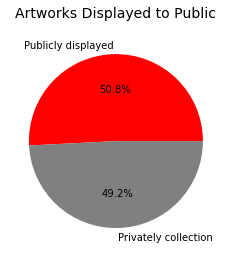

In [41]:
values = met_art['Is_Public_Domain'].value_counts()[:5].values
labels = ["Publicly displayed","Privately collection"]
plot_pie_chart(values, labels, "Artworks Displayed to Public",explode = (0,0))

In [42]:
# Step 1: create a subset
# define and create subset
private = met_art.copy()
private_collection = private[private['Is_Public_Domain'] == False]
public_collection = private[private['Is_Public_Domain'] == True]
private_sub = private.loc[:,['Object_ID','Object_End_Date', "Credit_Line","AccessionYear",'Classification',"Artist_Display_Name","Is_Public_Domain"]]
private_sub['year_a'] = year_clean(private_sub)
private_sub['decades_a'] = private_sub.year.dropna().apply(lambda x: int(x)//10 * 10)
private_sub['year_ob'] = private_sub['Object_End_Date'].apply(year)
private_sub['decades_ob'] = private_sub.year_ob.dropna().apply(lambda x: int(x)//100 * 100)
private_sub["decades_ob_new"] = private_sub["decades_ob"].apply(year_outlier)
private_sub["gift"] = private_sub["Credit_Line"].apply(purchase)
# test - to take outprivate_sub.set_index('Object_ID').loc[0:1]

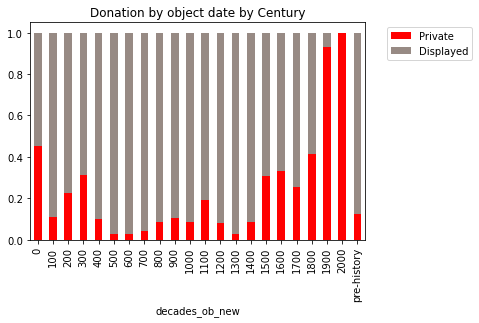

In [43]:
private_split = private_sub[["decades_ob_new","Is_Public_Domain"]]
b = private_split.groupby("decades_ob_new")["Is_Public_Domain"].value_counts(normalize = 1)
b = b.drop("future")
ts4 = b.to_frame().unstack().fillna(0)
graph2 = ts4.plot.bar(stacked = True,title = "Donation by object date by Century",color = color_met)
graph2.legend(["Private","Displayed"], bbox_to_anchor=(1.05, 1), loc='upper left')

C:\Users\helip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


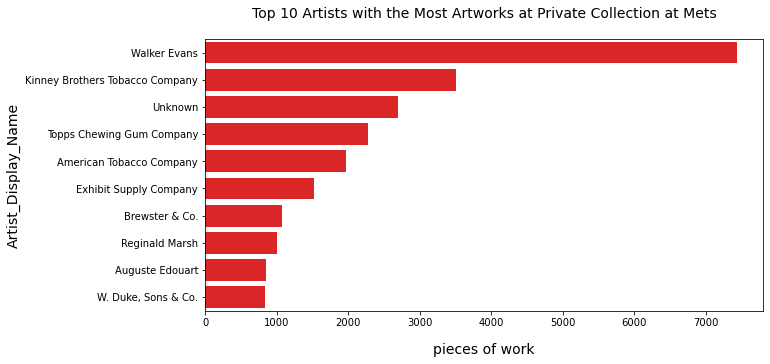

In [44]:
# top private artist
private_artist_top = private['Artist_Display_Name'].value_counts()[:10]
plot_bar_chart(private_collection, column="Artist_Display_Name", x = "pieces of work", title='Top 10 Artists with the Most Artworks at Private Collection at Mets')

C:\Users\helip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


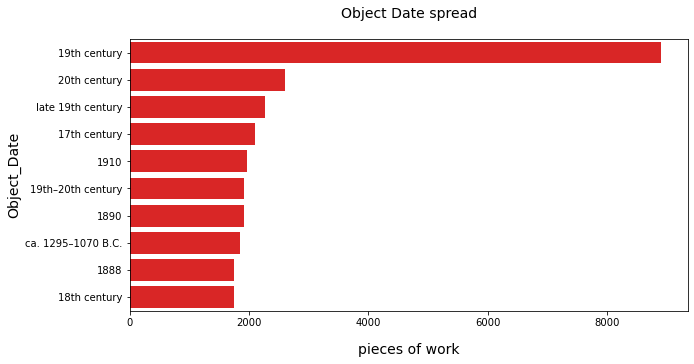

In [45]:
# read object_date 
plot_bar_chart(private_collection, column="Object_Date", x= "pieces of work", title='Object Date spread')

In [46]:
# for other charts
private_1 = private_collection.loc[:,["Object_ID",'Object_End_Date',"Culture", "Credit_Line","AccessionYear",'Classification',"Artist_Display_Name","Is_Public_Domain"]]
private_1['year_ob'] = private_1['Object_End_Date'].apply(year)
private_1['decades_ob'] = private_1.year_ob.dropna().apply(lambda x: int(x)//100 * 100)
private_1["decades_ob_new"] = private_1["decades_ob"].apply(year_outlier)
private_1["gift"] = private_1["Credit_Line"].apply(purchase)
private_df = private_1.set_index("Object_ID")
private_df.groupby("gift")['decades_ob_new'].value_counts()
private_df = private_1.set_index("Object_ID").groupby("decades_ob_new")["gift"].value_counts().to_frame().unstack()
private_df.drop(["pre-history","future"])
# private_df.columns = ["a","b"]

gift         
gift                gift purchase
decades_ob_new                   
0                12176.0   1830.0
100                154.0     44.0
200                515.0     66.0
300               1256.0    145.0
400                139.0      2.0
500                 39.0      2.0
600                 88.0      5.0
700                 79.0     13.0
800                128.0      3.0
900                228.0      8.0
1000               102.0      3.0
1100               441.0     42.0
1200               222.0     15.0
1300               123.0      7.0
1400               393.0     55.0
1500              7296.0    284.0
1600             10790.0    432.0
1700             13094.0    346.0
1800             49951.0   2724.0
1900            109057.0  10319.0
2000              5766.0   1283.0

### <font color = "red"> 3.5 What's the source of gift vs. purchase

In [47]:
# get an overview
a = met_art['Credit_Line'].value_counts()
b = met_art['Credit_Line'].describe()
c = met_art["Credit_Line"].isnull().value_counts()
d = ~met_art["Credit_Line"].isnull().value_counts()
print(a,b,c,d)

The Jefferson R. Burdick Collection, Gift of Jefferson R. Burdick                                           36976
Gift of Dietrich von Bothmer, Distinguished Research Curator, Greek and Roman Art, 2011                     16270
Walker Evans Archive, 1994                                                                                   7946
The Cesnola Collection, Purchased by subscription, 1874–76                                                   5359
Gift of J. Pierpont Morgan, 1917                                                                             4572
                                                                                                            ...  
Arthur Hoppock Hearn Fund, 1927                                                                                 1
Dorothy Noyes Arms and John Taylor Arms Memorial Collection, Gift of American Graphic Society Inc., 1955        1
Gift of F.T. and Joan Liu, 1997                                                         

In [48]:
# setting things up
source = met_art.copy()
source_sub = source
source['AccessionYear'].str.count("/").sort_values(ascending = False)
print(source.loc[179329, 'AccessionYear'])
print(source.loc[391005, 'AccessionYear'])
source['year'] = source['AccessionYear'].fillna(0)
source.at[179329, 'year'] = 2005
source.at[391005, 'year'] = 2005
source_sub["year"] = year_clean(source_sub)
source_sub["year"]

2/15/2005
3/23/2020


0         1979
1         7777
2         1967
3         1967
4         1967
          ... 
475015       0
475016       0
475017    1963
475018       0
475019       0
Name: year, Length: 475020, dtype: object

In [49]:
# Step 1: create a subset
source_sub = source.loc[:,['Object_ID', "Credit_Line", 'Object_End_Date', "AccessionYear",'Classification',"Artist_Display_Name"]]
source_sub['year_a'] = year_clean(source_sub)
source_sub['decades_a'] = source_sub.year.dropna().apply(lambda x: int(x)//10 * 10)
source_sub['year_ob'] = source_sub['Object_End_Date'].apply(year)
source_sub['decades_ob'] = source_sub.year_ob.dropna().apply(lambda x: int(x)//100 * 100)
source_sub["decades_ob_new"] = source_sub["decades_ob"].apply(year_outlier)
source_sub["gift"] = source_sub["Credit_Line"].apply(purchase)
source_sub.set_index('Object_ID').loc[110:112]

,Credit_Line,Object_End_Date,AccessionYear,Classification,Artist_Display_Name,year,year_a,decades_a,year_ob,decades_ob,decades_ob_new,gift
Object_ID,,,,,,,,,,,,
110,"Bequest of W. Gedney Beatty, 1941",1828,1941,Metal,James Davis,1941,1941,1940,1828,1800,1800,gift
111,"Bequest of W. Gedney Beatty, 1941",1828,1941,Metal,James Davis,1941,1941,1940,1828,1800,1800,gift
112,"Gift of The Wunsch Americana Foundation Inc., ...",1810,1985,Metal,John Molineux,1985,1985,1980,1810,1800,1800,gift


In [50]:
# Step 2 - creating DF
source_split = source_sub[["decades_ob_new","gift","decades_a"]]
a = source_split.groupby("decades_ob_new")["gift"].value_counts(normalize = 1)
a = a.drop(["future",0])
ts3 = a.to_frame().unstack().fillna(0)
a.unstack()["gift"].mean()

0.8796288297513465

In [51]:
a = source_sub['year_ob'] = source_sub['Object_End_Date'].apply(year)
source_sub['decades_ob']
source_split["decades_ob_new"]

0         1800
1         1900
2         1900
3         1900
4         1900
          ... 
475015    1900
475016    1900
475017    1800
475018    1800
475019    1800
Name: decades_ob_new, Length: 475020, dtype: object

#### <font color='red'> Findings: 
    
- Objects at the Met are either gifted or purchase (sometimes through a swap).  

- We have breakdown the percentage of gifted and purchased goods based on the centuries that objects are created.   As evidenced in the charts below that the Met has started to purchase more contemporary goods. 

- In terms of purchase ratio (amount of collections being purchased during a period) more collections has been purchased than gifted recently.  Anecdotally, 1870 is the period when Met is incorpoated  

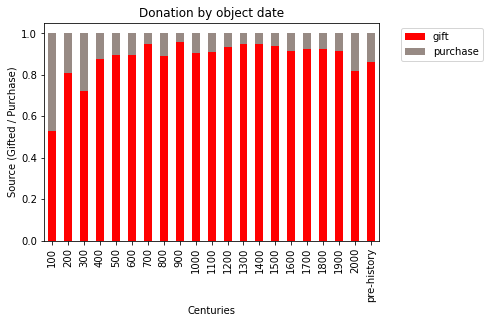

In [52]:
# step 3: create a chart - by object centry
graph1 = ts3.plot.bar(stacked = True,title = "Donation by object date",\
                      ylabel = "Source (Gifted / Purchase)", xlabel = "Centuries",\
                      color = color_met)  #,color = '#1D2F6F'
graph1.legend(["gift","purchase"],bbox_to_anchor=(1.05, 1), loc='upper left')

#graph1.ylabel('Millions of copies')
#graph1.ax(ind, menMeans, width, yerr=menStda, label='Men')
#graph1.ax.bar(ind, womenMeans, width,bottom=menMeans, yerr=womenStd, label='Women')

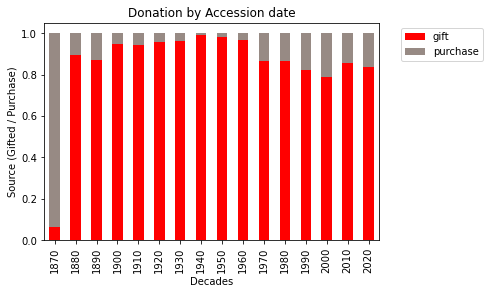

In [53]:
# step 4: create
b = source_split.groupby("decades_a")["gift"].value_counts(normalize = 1)  
b = b.drop([7770,0])
ts4 = b.to_frame().unstack().fillna(0)
graph2 = ts4.plot.bar(stacked = True,title = "Donation by Accession date",\
                      ylabel = "Source (Gifted / Purchase)", xlabel = "Decades",\
                      color = color_met)
graph2.legend(["gift","purchase"],bbox_to_anchor=(1.05, 1), loc='upper left')

#### <font color = "red"> 3.5.1 whose work has been purchased the most? 

Let’s put aside the question whether people are getting less generous for a moment.  An equally intriguring follow-up question is that whose work has the Met been purchasing?  

In [54]:
source_gift = source_sub[source_sub["gift"] == "gift"]
source_purchase = source_sub[source_sub["gift"] =="purchase"]
a = source_purchase
a[a["Artist_Display_Name"].isnull() == False]["Artist_Display_Name"].value_counts()[1:10]

Alphonse Bertillon                                                                                  434
Jacques Callot|Israël Henriet                                                                       427
John Thomson                                                                                        324
Utagawa Hiroshige                                                                                   255
Walker Evans                                                                                        253
Erté (Romain de Tirtoff)                                                                            197
Katsukawa Shunshō　勝川春章                                                                              166
Anna Atkins                                                                                         156
Louis Comfort Tiffany|Tiffany Studios|Tiffany Glass Company|Tiffany Glass and Decorating Company    136
Name: Artist_Display_Name, dtype: int64

C:\Users\helip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\helip\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\helip\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21213 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\helip\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24029 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\helip\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26149 missing from current font.
  font.set_

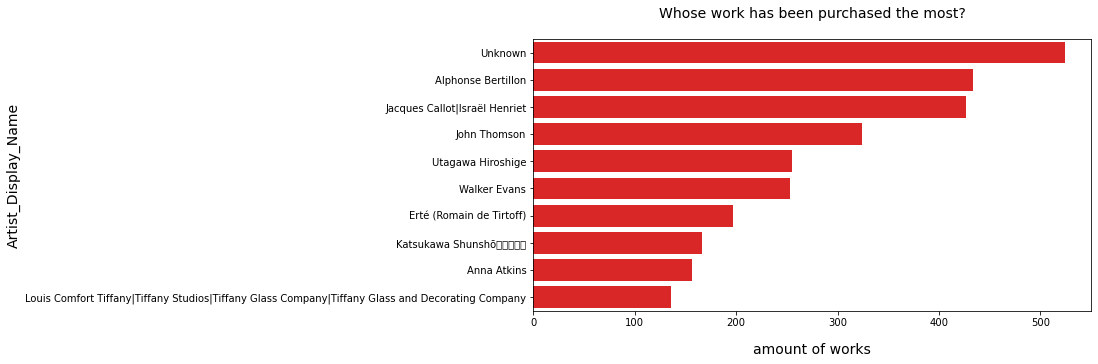

In [55]:
#####  Purhcased paintings

plot_bar_chart(source_purchase, column="Artist_Display_Name", x = "amount of works", title='Whose work has been purchased the most?')

**Alphonse Bertillon is on top the table.  Who is he?**

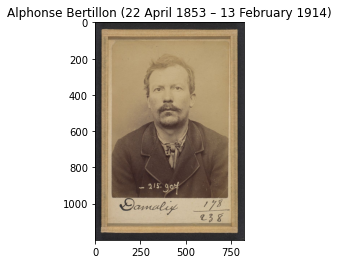

In [56]:
OpenImage('https://collectionapi.metmuseum.org/api/collection/v1/iiif/306754/1321572/main-image', 'Alphonse Bertillon (22 April 1853 – 13 February 1914)')

**Alphonse Bertillon (French, 22 April 1853 – 13 February 1914)**

- A French police officer and biometrics researcher who applied the anthropological technique of anthropometry to law enforcement creating an identification system based on physical measurements. Anthropometry was the first scientific system used by police to identify criminals. Before that time, criminals could only be identified by name or photograph. The method was eventually supplanted by fingerprinting.

- He is also the inventor of the mug shot. Photographing of criminals began in the 1840s only a few years after the invention of photography, but it was not until 1888 that Bertillon standardized the process

- Alphonse pioneers ’s work tops the table by amount of works (or pictures of suspects he collected).  

**Questions**   

hmmm... so he won by snapshotting a lot of suspects in France.   How about in terms of other artiwork? Whose painting has been purchased the most?

In [57]:
a = source_purchase[source_purchase["Classification"] == "Paintings"]
a["Artist_Display_Name"].value_counts()

Unidentified Artist       104
Shibata Zeshin             60
Loren MacIver               9
James Peale                 8
Tsubaki Chinzan             7
                         ... 
Mariano Sapia               1
John Henry Brown            1
Nishiyama Hōen              1
Ghasi                       1
Jasper Francis Cropsey      1
Name: Artist_Display_Name, Length: 927, dtype: int64

#### Shibata Zeshin

- Shibata Zeshin (柴田 是真, March 15, 1807 – July 13, 1891) was a Japanese lacquer, painter and print artist of the late Edo period and early Meiji era. 
- He has been called "Japan's greatest lacquerer",[1] but his reputation as painter and print artist is more complex: 
- In Japan, he is known as both too modern, a panderer to the Westernization movement, and also an overly conservative traditionalist who did nothing to stand out from his contemporaries. Despite holding this complicated reputation in Japan, Zeshin has come to be well regarded and much studied among the art world of the West, in Britain and the United States in particular.

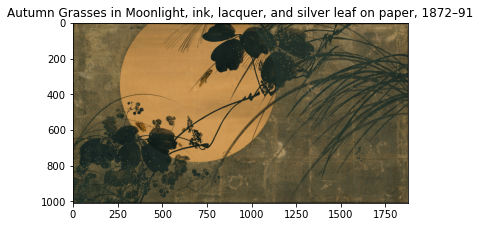

In [58]:
OpenImage("https://upload.wikimedia.org/wikipedia/commons/1/18/Shibata_Zeshin_002.jpg","Autumn Grasses in Moonlight, ink, lacquer, and silver leaf on paper, 1872–91")

#### <font color='red'> 3.6 Who has been donating, and are donation concentrated? 

In [59]:
# top donor donating trend

In [60]:
# data cleaning
def generous_clean(x):
    if "," in str(x):
        return x[0:x.index(',')]
    else:
        return x

In [61]:
source_gift_sub = source_gift[["Credit_Line","year"]]
source_gift.groupby("Credit_Line")["year"].value_counts().unstack()
source_gift["Credit_Line_new"] = source_gift["Credit_Line"].apply(generous_clean)
source_gift.value_counts()[0:3]

<ipython-input-61-70f357e01aff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  source_gift["Credit_Line_new"] = source_gift["Credit_Line"].apply(generous_clean)


Object_ID  Credit_Line                                                                                                     Object_End_Date  AccessionYear  Classification   Artist_Display_Name                               year    year_a  decades_a  year_ob  decades_ob  decades_ob_new  gift  Credit_Line_new                             
851503     The Jefferson R. Burdick Collection, Gift of Jefferson R. Burdick                                               1890             1963.0         Prints|Ephemera  D. Buchner & Co., New York                        1963.0  1963.0  1960       1890     1800        1800            gift  The Jefferson R. Burdick Collection             1
360521     Gift of Janos Scholz and Anne Bigelow Scholz, in memory of Flying Officer Walter Bigelow Rosen, RCAF, 1949\r\n  1560             1949.0         Drawings         Anonymous, French, 16th century                   1949.0  1949.0  1940       1560     1500        1500            gift  Gift of Janos Scholz and Anne

#### <font color='red'> Findings:  
    
Rogers' fund has been donating the most

C:\Users\helip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


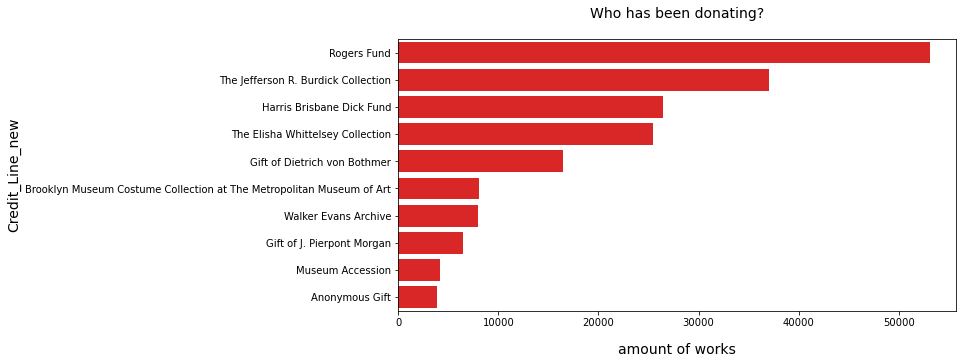

In [62]:
plot_bar_chart(source_gift, column="Credit_Line_new", x = "amount of works", title='Who has been donating?')

**Who is Rogers?**

#### <font color='red'> Findings: 

- Rogers fund has been donating 53,000 pieces historically, being the most generous donor throughout the Met's history 

- Rogers fund has been donating throughout the first decade of 20th century 

- Jacob Rogers was president of Rogers Locomotive and Machine Works and served as the company's president. The company eventually became the second most popular steam locomotive manufacturer in North America.Upon Rogers' death in 1901, he bequeathed the majority of his fortune, amounting to $8 million, to the Metropolitan Museum of Art in New York City. The Museum continues to acquire art works in his name through the "Jacob S. Rogers Fund."

 

In [63]:
Rogers = source_gift[source_gift["Credit_Line_new"] == "Rogers Fund"]
Rogers["year"].value_counts().iloc[0:10]

1909.0    3614
1908.0    3077
1948.0    2524
1917.0    2432
1920.0    2304
1941.0    2143
1922.0    1804
1912.0    1623
1925.0    1567
1913.0    1522
Name: year, dtype: int64

In [64]:
Rogers["year"].value_counts().sum()

53082

#### Who has been donating lately? 

#### <font color='red'> Findings: 

- A private collector named Nanette B. Kelekian has been gifting the most to the Met in recent decades.   
- We have also run a similar analysis of gifted artworks in the most recent decades. Below are the top donors. As we can see the amount of pieces top donors gifts to the Met is fewer.   

In [65]:
source_gift[source_gift["decades_a"] == 2000]["Credit_Line_new"].value_counts()[:10]


Brooklyn Museum Costume Collection at The Metropolitan Museum of Art    8086
Gilman Collection                                                       1605
Gift of Nanette B. Kelekian                                              887
Samuel Eilenberg Collection                                              738
Bequest of William S. Lieberman                                          710
Gift of Muriel Kallis Newman                                             472
Gift of Sarah Shay                                                       428
Gift of the artist                                                       421
Gift of Mr. and Mrs. Eugene V. Thaw                                      242
Herbert Mitchell Collection                                              234
Name: Credit_Line_new, dtype: int64

#### Sample of Nanette B. Kelekian's contribution 


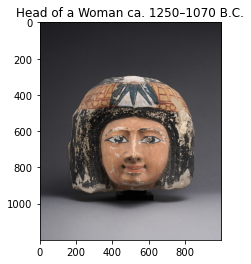

In [84]:
OpenImage("https://collectionapi.metmuseum.org/api/collection/v1/iiif/773251/1806554/main-image","Head of a Woman ca. 1250–1070 B.C.")

#### <font color = "red"> 3.7  China zoom-in

In [67]:
# Get a describtion
China = met_art[met_art['Culture'] == "China"]
China.describe()

,Object_ID,Object_Begin_Date,Object_End_Date,Metadata_Date
count,13432.000000,13432.000000,13432.000000,0.0
mean,65055.460765,1360.446769,1495.194312,NaN
std,90636.459309,787.717683,689.634919,NaN
min,7411.000000,-10000.000000,-3950.000000,NaN
25%,43284.750000,1368.000000,1532.750000,NaN
50%,49902.500000,1700.000000,1795.000000,NaN
75%,63488.250000,1800.000000,1899.000000,NaN
max,844397.000000,2018.000000,2029.000000,NaN


#### <font color = "red"> Findings:  

We have zoomed in a particular culture of China.   As we would expected if we are similar with history, most of the collections are ceramics, which accounts for most of the collections within China collections (China also means ceramics), followed by paintings  Ceramis accounts for most of the collections within China collections, followed by paintings

C:\Users\helip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


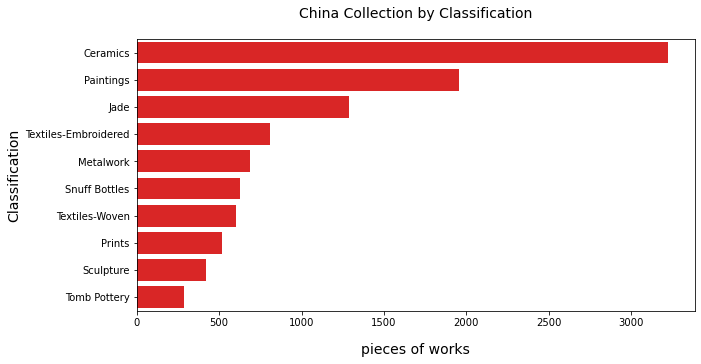

In [68]:
plot_bar_chart(China, column="Classification", x = "pieces of works", title='China Collection by Classification')

#### Most of collections are from Qing Dynasty (most recent)

C:\Users\helip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


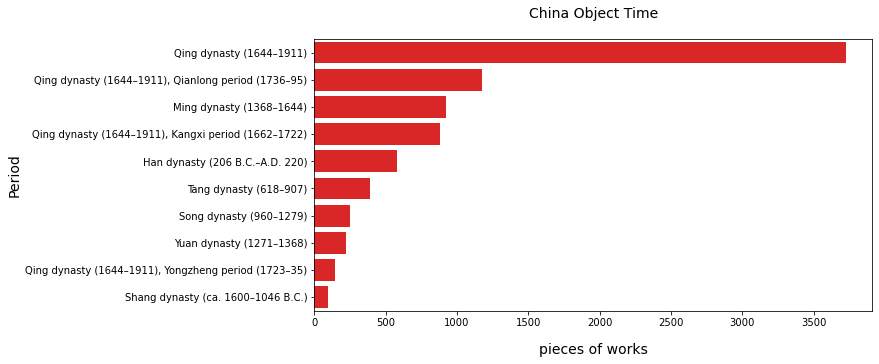

In [69]:
plot_bar_chart(China, column="Period", x = "pieces of works", title='China Object Time')

C:\Users\helip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


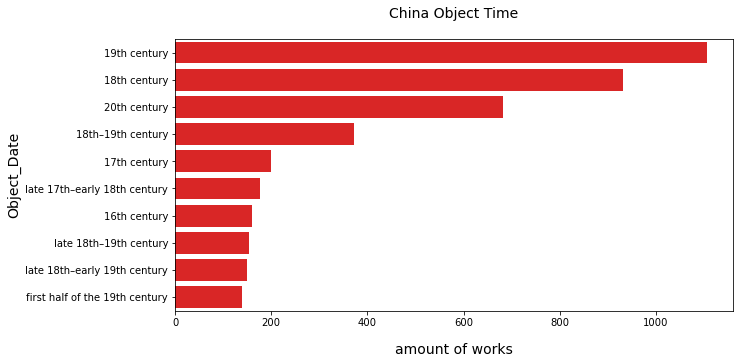

In [70]:
plot_bar_chart(China, column="Object_Date", x= "amount of works", title='China Object Time')

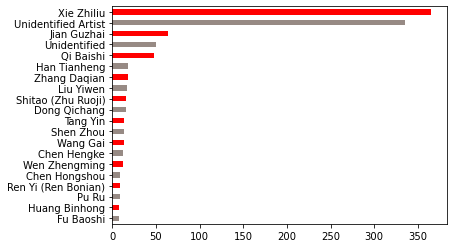

In [71]:
p_top_artist = China['Artist_Display_Name'].value_counts().sort_values(ascending = False)[:20]
#p_top_artist.plot(kind= 'bar')
p_top_artist.plot.barh(color = color_met)
plt.gca().invert_yaxis()

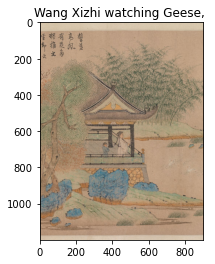

In [72]:
OpenImage("https://collectionapi.metmuseum.org/api/collection/v1/iiif/40081/198958/main-image","Wang Xizhi watching Geese, ")

#### <font color='red'> Findings

After the fall of Hangzhou, the Southern Song capital, in 1276, the artist Qian Xuan chose to live as an yimin, a “leftover subject” of the dynasty. Painted in his deliberately primitive “blue-and-green” style, this handscroll illustrates the story of Wang Xizhi (  303 – 361), the calligraphy master of legendary fame and a practitioner of Daoist alchemy, who was said to derive inspiration from natural forms such as the graceful neck movements of geese. In creating a dreamlike evocation of antiquity, the artist prevented a realistic reading of his picture space as a way of asserting the disjuncture he felt after the fall of the Song royal house.

#### <font color='red'>3.8 Zoom in One Famous Artist - Vincent Van Gogh

Year 1888 is the breakthrough year of Van Gogh. "The time in Arles became one of Van Gogh's more prolific periods: he completed 200 paintings and more than 100 drawings and watercolours.He was enchanted by the local countryside and light; his works from this period are rich in yellow, ultramarine and mauve. His paintings include harvests, wheat fields and general rural landmarks from the area"

#### Question: Are we able to visually see this pre-1888 and post-1888 painting style change from his art?

In [73]:
# Zoom in one famous artist - Vincent Van Gogh

# Preview the art below and pop-up one on laptop
# Locate Arts in Blue Period (1901-1904)
met_art2 = pd.DataFrame(met_art)
met_art2.columns = met_art2.columns.str.replace(' ', '_')
data2 = met_art2[['Object_Number','Object_Name','Title','Artist_Display_Name','Is_Highlight','Is_Public_Domain','Object_Begin_Date']]
data2[(data2['Artist_Display_Name'] == 'Vincent van Gogh') & (data2['Object_Begin_Date'] >= 1888)] 

,Object_Number,Object_Name,Title,Artist_Display_Name,Is_Highlight,Is_Public_Domain,Object_Begin_Date
172299,1994.265.11,Books,Lettres de Vincent van Gogh a Son Frère Théo,Vincent van Gogh,False,False,1937
204099,62.151,Drawing,The Zouave,Vincent van Gogh,False,True,1888
204100,64.125.3,Drawing,Wheat Field,Vincent van Gogh,False,True,1888
204863,48.190.1,Drawing,Street in Saintes-Maries-de-la-Mer,Vincent van Gogh,False,True,1888
204872,48.190.2,Drawing,Corridor in the Asylum,Vincent van Gogh,True,True,1889
295855,1993.400.4,Painting,Bouquet of Flowers in a Vase,Vincent van Gogh,False,True,1890
295856,64.165.2,Painting,"First Steps, after Millet",Vincent van Gogh,False,True,1890
295857,56.13,Painting,The Flowering Orchard,Vincent van Gogh,False,True,1888
295858,58.187,Painting,Irises,Vincent van Gogh,True,True,1890
295859,51.112.3,Painting,L'Arlésienne: Madame Joseph-Michel Ginoux (Mar...,Vincent van Gogh,False,True,1888


In [74]:
data2[(data2['Artist_Display_Name'] == 'Vincent van Gogh') & (data2['Object_Begin_Date'] < 1888)] 

,Object_Number,Object_Name,Title,Artist_Display_Name,Is_Highlight,Is_Public_Domain,Object_Begin_Date
204101,1972.118.281,Drawing,Nursery on Schenkweg,Vincent van Gogh,False,True,1882
295854,49.41,Painting,Sunflowers,Vincent van Gogh,False,True,1887
295861,1984.393,Painting,Peasant Woman Cooking by a Fireplace,Vincent van Gogh,False,True,1885
295862,67.187.70a,Painting,Self-Portrait with a Straw Hat (obverse: The P...,Vincent van Gogh,True,True,1887
297135,1998.325.1,Painting,Olive Trees,Vincent van Gogh,False,True,1853
297307,67.187.70b,Painting,The Potato Peeler (reverse: Self-Portrait with...,Vincent van Gogh,False,True,1885
310369,1975.1.774,Drawing,Road in Etten,Vincent van Gogh,True,True,1881


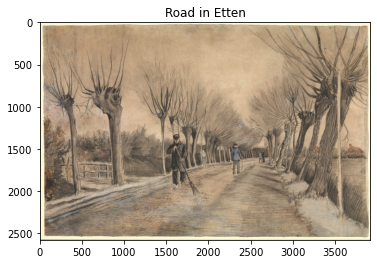

In [75]:
# One Van Gogh's art before 1888
OpenImage('https://images.metmuseum.org/CRDImages/rl/original/DP359031.jpg', 'Road in Etten')

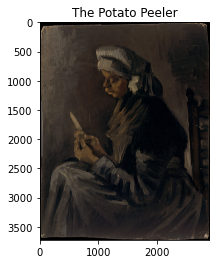

In [76]:
# One Van Gogh's art before 1888
OpenImage('https://images.metmuseum.org/CRDImages/ep/original/DT1503.jpg','The Potato Peeler')

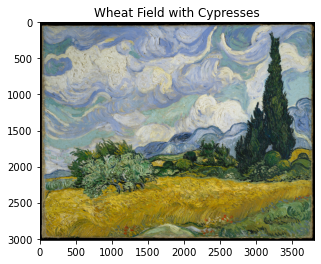

In [77]:
# One Van Gogh's art after 1888
OpenImage('https://images.metmuseum.org/CRDImages/ep/original/DT1567.jpg', 'Wheat Field with Cypresses')

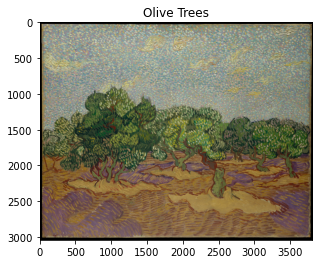

In [78]:
# One Van Gogh's art after 1888
OpenImage('https://images.metmuseum.org/CRDImages/ep/original/DT1946.jpg', 'Olive Trees')

#### <font color='red'>3.8 Zoom in another famous artist - Pablo Picasso

Picasso's work is often categorized into periods. While the names of many of his later periods are debated, one of them commonly accepted periods in his work are the Blue Period (1901–1904) - characterized by sombre paintings rendered in shades of blue and blue-green only colors. 

Hypothesis: His painings during 1901-1904 should have a strong reflective of this Blue Period style. 

In [79]:
# Locate Arts in Blue Period (1901-1904)
met_art1 = pd.DataFrame(met_art)
met_art1.columns = met_art1.columns.str.replace(' ', '_')
data1 = met_art1[['Object_Number','Object_Name','Title','Artist_Display_Name','Is_Highlight','Is_Public_Domain','Object_Begin_Date']]
data1[(data1['Artist_Display_Name'] == 'Pablo Picasso') & (data1['Object_Begin_Date'] >= 1901) & (data1['Object_Begin_Date'] <= 1904)]


,Object_Number,Object_Name,Title,Artist_Display_Name,Is_Highlight,Is_Public_Domain,Object_Begin_Date
311096,1975.1.979,Drawing,Seated Woman with a Mandolin,Pablo Picasso,False,False,1901
322892,1976.201.29,Drawing,Seated Figure,Pablo Picasso,False,False,1902
323839,"1982.179.17a, b",Drawing,Jardin de Paris (Design for a Poster),Pablo Picasso,False,False,1901
324638,1984.433.22,Painting,Erotic Scene (La Douceur),Pablo Picasso,False,False,1903
324649,1984.433.23,Painting,Mother and Child by a Fountain,Pablo Picasso,False,False,1901
327916,1996.441,Drawing,Mother and Child on a Bench,Pablo Picasso,False,False,1901
329347,49.70.2,Painting,Woman Ironing,Pablo Picasso,False,False,1901
329393,49.70.32,Drawing,Study of a Harlequin,Pablo Picasso,False,False,1904
329506,50.188,Painting,The Blind Man's Meal,Pablo Picasso,False,False,1903
329574,52.175,Painting,The Actor,Pablo Picasso,False,False,1904


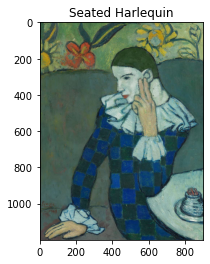

In [80]:
# After observing the data, realized none of them are in public domain.
# Cannot be downloaded from Mets data so found from online source.
# One Picasso's art during blue period
OpenImage('https://images-na.ssl-images-amazon.com/images/I/81deIG4T1AL._AC_SL1200_.jpg', 'Seated Harlequin')

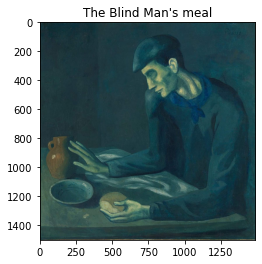

In [81]:
# One Picasso's art during blue period
OpenImage('https://images-na.ssl-images-amazon.com/images/I/71bJdSXITnL._AC_SL1500_.jpg', 'The Blind Man\'s meal')

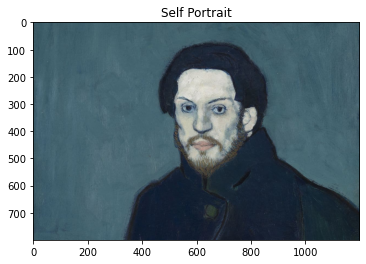

In [82]:
# One Picasso's art during blue period
OpenImage('https://d16kd6gzalkogb.cloudfront.net/magazine_images/Pablo-Picasso-Autoportrait-1901-detail.jpg', 'Self Portrait')

#### <font color = "red"> 3.81 Can we find painting style change from Picasso's self-portrait?

“To my mind the most interesting thing in art is the 
personality of the artist” 
― W. Somerset Maugham , The Moon and Sixpence

Assuming Picasso's constantly style changing is evident in his series of self-portraits, which he painted from the age of 15 until 90.

In [83]:
images = [Image.open(x) for x in ['sp_1896.jpg', 'sp_1901.jpg','sp_1907.jpg']]
images1 = [Image.open(x) for x in ['sp_1938.jpg', 'sp_1965.jpg','sp_1966.jpg']]
images2 = [Image.open(x) for x in ['sp_1971.jpg', 'sp_1972.jpg','sp_1972_1.jpg']]

widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)
new_im = Image.new('RGB', (6000, 6000))
    
# Provide the target width and height of the image    
x_offset = 0
for im in images:
    new_im.paste(im.resize((2000, 2000)), (x_offset,0))
    x_offset += 2000
imshow(new_im)

# Provide the target width and height of the image    
x_offset = 0
for im in images1:
    new_im.paste(im.resize((2000, 2000)), (x_offset,2000))
    x_offset += 2000
imshow(new_im)

# Provide the target width and height of the image    
x_offset = 0
for im in images2:
    new_im.paste(im.resize((2000, 2000)), (x_offset,4000))
    x_offset += 2000
imshow(new_im)
new_im.save('picasso.jpg')

FileNotFoundError: [Errno 2] No such file or directory: 'sp_1896.jpg'

### <font color = 'red'> Limitations 

We hope the results would intrigue audience of the report to visit the Met again and select the collections to visit with a different perspective. In addition, it would also allow us to think further on the challenges of maintaining the status of such institution. 

However, there are some limitations to our analysis. First of all, given the richness of the data, we could use others variables like department and artist gender to conduct more analysis but that is limited by time constraints. 

In addition, some of the categorization displayed in the dataset is very technical. For example, under classification, there are different types and by various materials. That would make the categorization of the overall collection less straightforward to be understood by non-art savy viewers.  

### <font color = 'red'> Conclusion: 

We think the Met has much more story to normal visitors like us than what it appears to be when we visit every time. We may go to Van Gaugh, Picasso and other famous art work or artist immediately when we visit. However, the Met contains much more than that and it could be significantly impacted by where the piece of art come from. 
    
Another interesting conclusion from our analysis is that the Met seems to have less proportion of collections as gifted from donors compared with historically, and average amount of pieces of works donated in recent decade also decreased compared with historical numbers.   

## Source

1. colorcode "https://blog.csdn.net/guoxinian/article/details/80242353?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522161848004816780264020306%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=161848004816780264020306&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_v2~rank_v29-1-80242353.pc_search_result_cache&utm_term=python+%E9%A2%9C%E8%89%B2"
2. http://www.javashuo.com/article/p-otlxxqam-w.html